# Regression models on Yonge St flow dataset

In [2]:
import ml_help
import pd as pd
from pd.model_selection import train_test_split
plot_label="Speed (km/h)"

## Start by manipulating data

- Import data

In [3]:
df = pd.read_csv("./data/yonge_flow.csv.zip")
df.head(3)

,collectedAt,month,day,day_of_week,hour,minute,currentSpeed
0,2022-07-14 12:45:00+00:00,July,14,Thursday,12,45,10
1,2022-07-14 12:51:44+00:00,July,14,Thursday,12,51,13
2,2022-07-14 12:55:27+00:00,July,14,Thursday,12,55,18


- Remove column "collectedAt" because it is not needed at this moment

In [4]:
df.drop(["collectedAt"],axis=1,inplace=True)
df.head(3)

,month,day,day_of_week,hour,minute,currentSpeed
0,July,14,Thursday,12,45,10
1,July,14,Thursday,12,51,13
2,July,14,Thursday,12,55,18


## Begin ML tasks
- Let us first study the influence of time period in the speed
- y: target (current speed)
- X: features

No need to manually normalize the target because I will use StandardScaler

In [6]:
categorical_feats = ["month","day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_feats)
transformed_df = transformed_df.astype("float32")
transformed_df.head(3)

,day,hour,minute,currentSpeed,month_August,month_December,month_February,month_January,month_July,month_March,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,14.0,12.0,45.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14.0,12.0,51.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.0,12.0,55.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
X = transformed_df.drop("currentSpeed",axis=1)
y = transformed_df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

### LinearSVR
- Can't use Epsilon-Support Vector Regression because it doesn't scale well for large sets
- SKlearn docs say the "limit" is couple of 10Ks of data points and my set has 70K+
- Because of this limitation, I'm starting out with LinearSVR
- SKLearn docs suggest dual = False when N-samples > N-features

Steps:
1) Create the regressor itself
2) Use the regressor and the data with K-fold cross-validation (K=10)

Fitting model...
Fitting model... OK! Took 0.3377070426940918 seconds

model Linear Regression
r2 0.16004294157028198
mae 2.6094675064086914
mse 9.750129699707031
rmse 3.1225197315216064
mape 86567205000000.0
time_to_fit 0.3377070426940918
time_to_predict 0.012007474899291992

Dumping model...
Dumping model... OK! Took 0.0020744800567626953 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


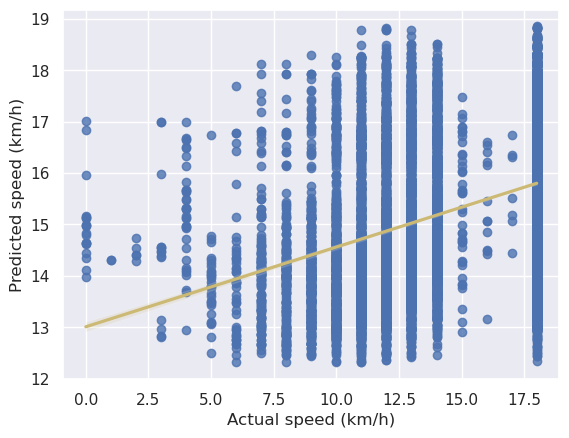

In [8]:
from sklearn.linear_model import LinearRegression

file_name = "021_linear_regression"
model_name = "Linear Regression"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, LinearRegression(), X_train, X_val, y_train, y_val, plot_label)

### Logistic Regression

Fitting model...
Fitting model... OK! Took 0.11471390724182129 seconds

model Logistic Regression
r2 -0.5715475082397461
mae 2.570523500442505
mse 18.242353439331055
rmse 4.271106719970703
mape 103756290000000.0
time_to_fit 0.11471390724182129
time_to_predict 0.01046133041381836

Dumping model...
Dumping model... OK! Took 0.004061460494995117 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


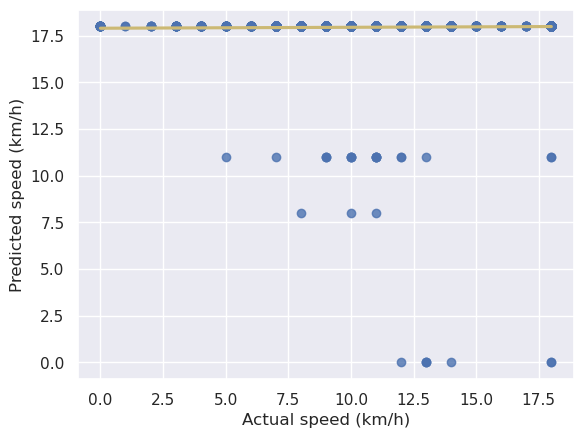

In [9]:
from sklearn.linear_model import LogisticRegression

file_name = "021_logistic_regression"
model_name = "Logistic Regression"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, LogisticRegression(), X_train, X_val, y_train, y_val, plot_label)

### Lasso

Fitting model...
Fitting model... OK! Took 0.04787111282348633 seconds

model Lasso
r2 0.032193124294281006
mae 3.013026714324951
mse 11.234196662902832
rmse 3.351745367050171
mape 88710550000000.0
time_to_fit 0.04787111282348633
time_to_predict 0.013997554779052734

Dumping model...
Dumping model... OK! Took 0.0038695335388183594 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


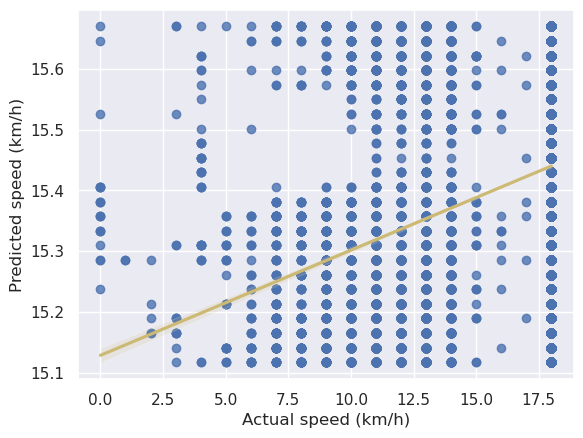

In [10]:
from sklearn.linear_model import Lasso

file_name = "021_lasso"
model_name = "Lasso"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, Lasso(), X_train, X_val, y_train, y_val, plot_label)

### Elastic Net

Fitting model...
Fitting model... OK! Took 0.03553056716918945 seconds

model Elastic Net
r2 0.07560354471206665
mae 2.9201865196228027
mse 10.730293273925781
rmse 3.275712728500366
mape 88677420000000.0
time_to_fit 0.03553056716918945
time_to_predict 0.013210296630859375

Dumping model...
Dumping model... OK! Took 0.005877494812011719 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


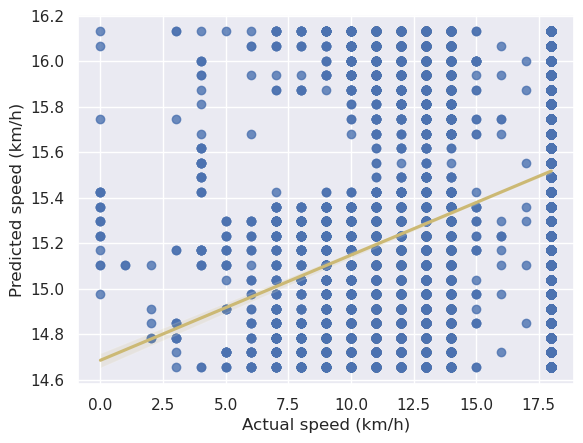

In [11]:
from sklearn.linear_model import ElasticNet

file_name = "021_elastic_net"
model_name = "Elastic Net"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, ElasticNet(), X_train, X_val, y_train, y_val, plot_label)

### Random Forest

Fitting model...
Fitting model... OK! Took 2.972306489944458 seconds

model Random Forest
r2 0.5667193531990051
mae 1.5962496995925903
mse 5.02947473526001
rmse 2.2426490783691406
mape 4538606000000.0
time_to_fit 2.972306489944458
time_to_predict 0.28378796577453613

Dumping model...
Dumping model... OK! Took 6.9301018714904785 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


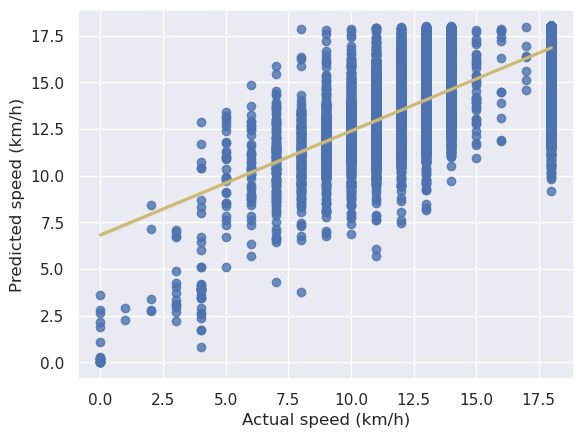

In [12]:
from sklearn.ensemble import RandomForestRegressor

file_name = "021_random_forest"
model_name = "Random Forest"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(), X_train, X_val, y_train, y_val, plot_label)

### Decision Tree

Fitting model...
Fitting model... OK! Took 0.16292428970336914 seconds

model Decision Tree
r2 0.25717077360851026
mae 1.716754127735825
mse 8.622680148470497
rmse 2.9364400468033565
mape 1152847722352.749
time_to_fit 0.16292428970336914
time_to_predict 0.008191823959350586

Dumping model...
Dumping model... OK! Took 0.6565361022949219 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


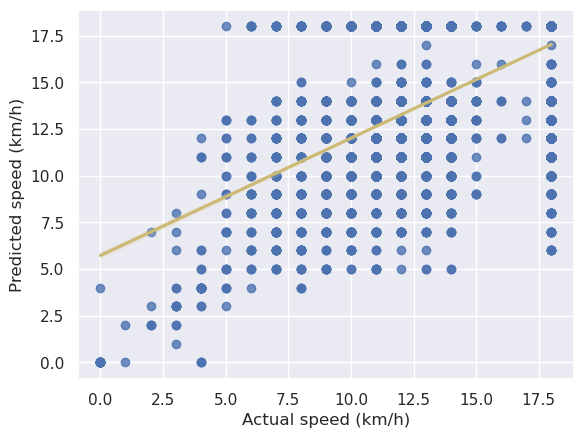

In [13]:
from sklearn.tree import DecisionTreeRegressor

file_name = "021_decision_tree"
model_name = "Decision Tree"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(), X_train, X_val, y_train, y_val, plot_label)

### XGBoost

Fitting model...
Fitting model... OK! Took 0.3514211177825928 seconds

model XGBoost
r2 0.5444027972353682
mae 1.6848122
mse 5.2885227
rmse 2.2996788
mape 16226521000000.0
time_to_fit 0.3514211177825928
time_to_predict 0.017920970916748047

Dumping model...
Dumping model... OK! Took 0.05542302131652832 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


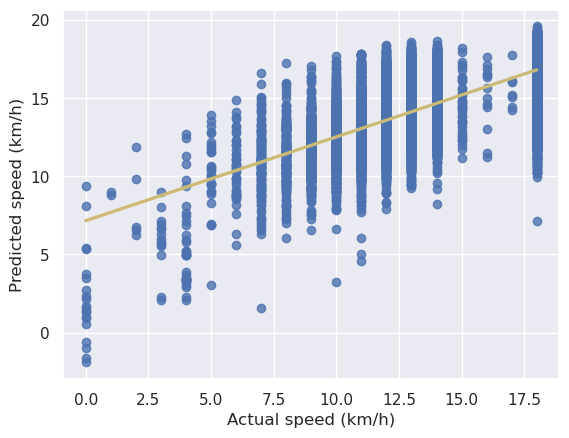

In [14]:
import xgboost as xgb

file_name = "021_xgboost"
model_name = "XGBoost"

xgb_params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**xgb_params), X_train, X_val, y_train, y_val, plot_label)

## Begin DL tasks

### Multi-layer Perceptron

Fitting model...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 42.54679560661316 seconds

model MLP
r2 0.46373394798228984
mae 1.8697869
mse 6.2249174
rmse 2.4949784
mape 39512080000000.0
time_to_fit 42.54679560661316
time_to_predict 0.021900177001953125

Dumping model...
Dumping model... OK! Took 0.009012937545776367 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


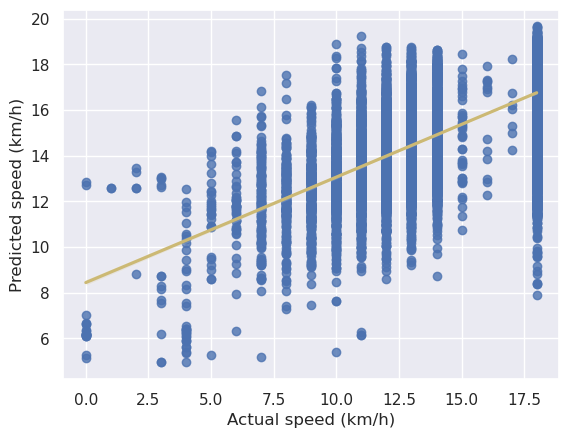

In [15]:
from sklearn.neural_network import MLPRegressor

file_name = "021_mlpr"
model_name = "MLP"

model_train,model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(), X_train, X_val, y_train, y_val, plot_label)